# lr 
El objetivo es analizar el mejor valor de lr para evitar iteraciones acerca en su variable. 

In [1]:
import torch as pt

## 1.Creando la funcción que cree los datos iniciales:
Creando una *función lineal por sectores* cuyo eje principal sea:  $f(x)= -6x +10$ 

In [2]:
from torch.utils.data import Dataset

In [3]:
class Data(Dataset):
    def __init__(self,train= True):
        self.x=pt.arange(-5,5,0.1).view(-1,1)
        self.y=-6*self.x + 10+ 0.65*pt.randn(self.x.size())
        self.len= self.x.shape[0]
        if train == True:
            self.y[0:20]= self.y[0:20]+30
            self.y[80:100]= self.y[80:100]-40
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

**Ojo** que se están creando dos funciones:

In [4]:
train_data=Data()
val_data= Data(train=False)

Viendo con atención las diferencias entre ambas funciones:

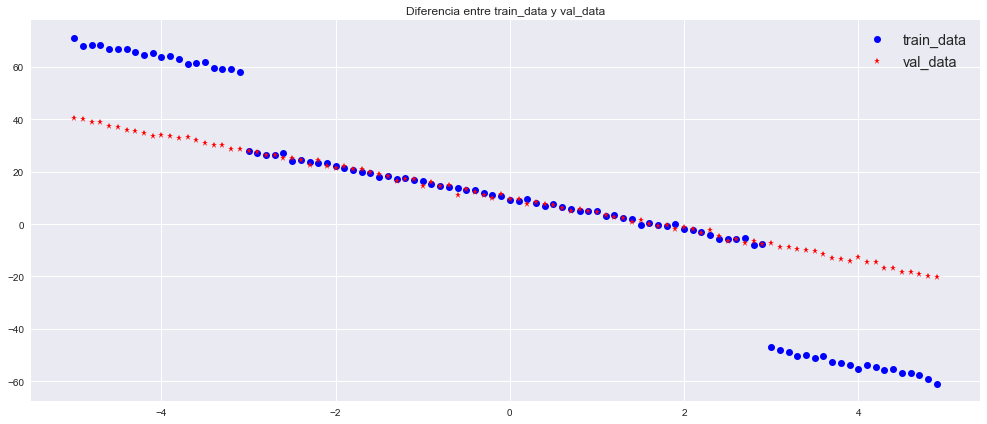

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize= (17,7))
ax.plot(train_data.x.numpy(),train_data.y.numpy(),'bo', color= 'blue', label='train_data')
ax.plot(val_data.x.numpy(),val_data.y.numpy(),'*',color= 'red',label='val_data')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('Diferencia entre train_data y val_data')
legend.get_frame().set_facecolor('cyan')
plt.show()

## 2.Creando el programa  de la función lineal $Loss$:

In [7]:
import torch.nn as nn

In [8]:
class LR(nn.Module):
    def __init__(self,in_size,out_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,out_size)
        
    def forward(self,x):
        out= self.linear(x)
        return out    

Definiendo la **función objetivo**: $$ \Large g(y^*,y)= \frac{1}{N}\sum_{n=1}^N (y^*-y)^2 $$

In [9]:
def criterion(yhat,y):
    return pt.mean((yhat-y)**2)

Creando el `trainloader` con el tamaño de filas segmentadas ( Metodo de Batch) de una unidad:

In [10]:
from torch.utils.data import DataLoader
trainloader= DataLoader(dataset=train_data,batch_size=1)

Creando los inputs:

In [11]:
learning_rates=[0.0001,0.001,0.01,0.1]
train_error=[]
val_error=[]
MODELOS=[]

Evaluando en el programa:

In [12]:
for lr in learning_rates:
    model=LR(1,1)
    optimizer=pt.optim.SGD(model.parameters(),lr=lr)
    for epoch in range(5):
        for x,y in trainloader:
            yhat= model(x)
            loss= criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    train_error.append(float(loss))
    yhat= model(val_data.x)
    loss=criterion(yhat,val_data.y)
    val_error.append(float(loss))
    MODELOS.append(model)    

Procediendo a graficarlo los errores:

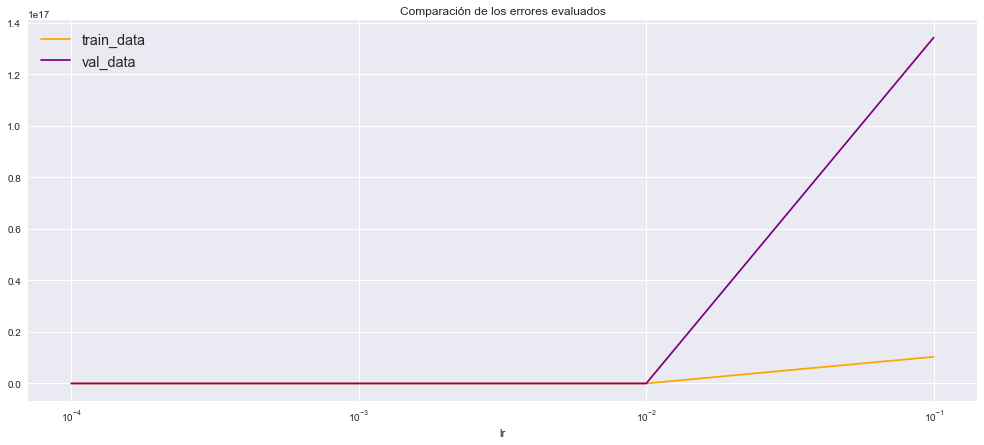

In [13]:
fig, ax = plt.subplots(figsize= (17,7))
ax.semilogx(learning_rates,train_error, color= 'orange', label='train_data')
ax.semilogx(learning_rates,val_error,color= 'purple',label='val_data')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title('Comparación de los errores evaluados')
plt.xlabel('lr')
legend.get_frame().set_facecolor('cyan')
plt.show()

Ahora observando los modelos creados respecto a `val_data`:

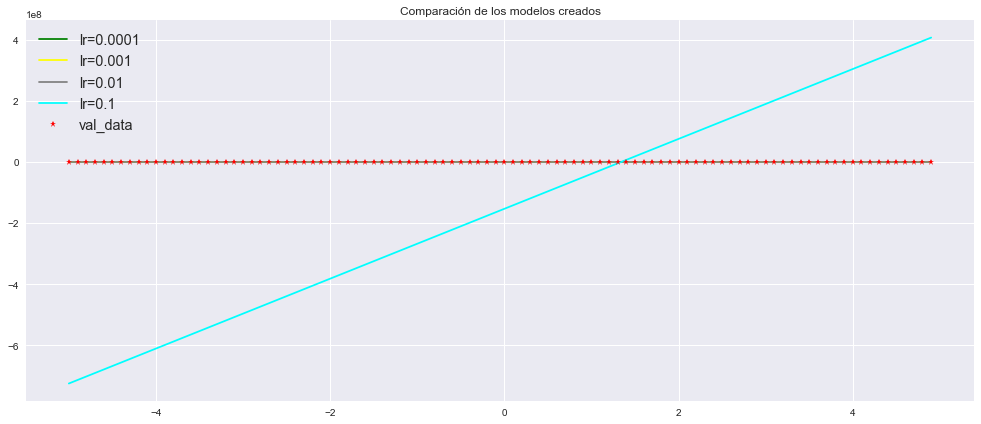

In [25]:
colores= ['green','yellow','grey','cyan']
plt.figure(figsize= (17,7))
for ind,model in enumerate(MODELOS):
    plt.plot(val_data.x.numpy(),model(val_data.x).detach().numpy(),color= colores[ind],label= 'lr={0}'.format(learning_rates[ind]))
plt.plot(val_data.x.numpy(),val_data.y.numpy(),'*',color='red',label='val_data')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title('Comparación de los modelos creados') 
plt.show()

- Los modelos con lr iguales a 0.0001 y 0.001 están sobrepuestos al modelo de lr= 0.01, que a su ves este modelo está sobrepuesta a `val_data`.
- Por lo que a fines prácticos, **se está considerando $lr$ $óptimo$ al valor de 0.01**